### Project 2: Simple PCA for Image Compression 
#### Objective: Use PCA to compress a simple grayscale image. 

##### Step 1: Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# PIL stands for Python Imaging Library
# This library that lets Python open, edit, and process images easily

##### Step 2: Load a color image and convert it to grayscale

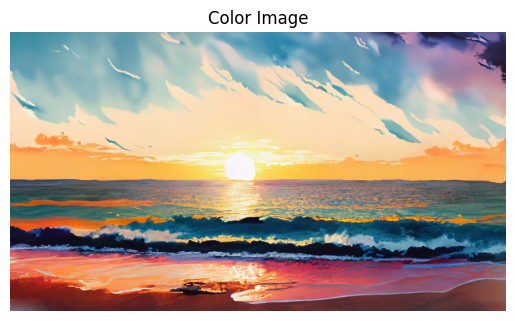

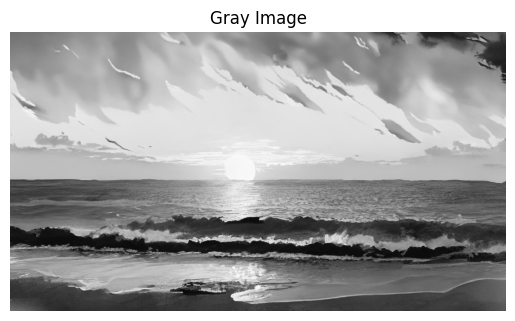

[[114 113 112 ...  96  95  95]
 [114 113 112 ...  92  93  92]
 [115 114 113 ...  91  92  93]
 ...
 [114 115 117 ...  84  85  86]
 [114 114 116 ...  84  85  85]
 [116 116 119 ...  84  83  83]]
Original grayscale shape: (1080, 1920)


In [ ]:
img = Image.open("sample.jpg")
plt.imshow(img)
plt.axis('off')
plt.title("Color Image")
plt.show()

# Convert to grayscale
gray_img = img.convert('L')  # 'L' mode = 8-bit grayscale

# Converts it to grayscale — 1 channel (0–255) instead of 3 (RGB)

plt.imshow(img)
plt.imshow(gray_img, cmap='gray')
plt.title("Gray Image")
plt.axis('off')
plt.show()

# Convert to numpy array
gray_array = np.array(gray_img)

print(gray_array)
print("Original grayscale shape:", gray_array.shape)
# Each number = pixel brightness.
# gray_array.shape - how many rows and columns (and channels) your image array has

##### Step 3: PCA (Manual Steps)
##### Normalize pixel values (optional, improves PCA)

In [20]:
# Normalize pixel values (optional, improves PCA)
gray_mean = np.mean(gray_array, axis=0)
X_centered = gray_array - gray_mean

# np.mean(..., axis=0) finds the average value of each column (pixel column mean)
# Subtracting it (gray_array - gray_mean) centers the data → mean becomes 0


##### Step 4: Find the Covariance Matrix

In [14]:
cov_matrix = np.cov(X_centered, rowvar=False)

# The covariance matrix shows how pixel values vary together
# This matrix helps PCA find directions (patterns) of maximum variation
# rowvar=False - When doing PCA, we need the covariance matrix to describe relationships between features, not between rows
# Which pixel combinations carry the most information

##### Step 5: Eigenvalues and Eigenvectors(Eigen decomposition)

In [15]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# PCA finds eigenvectors (directions of most variation).
# Each eigenvalue tells how much information that direction carries.
# Big eigenvalue → important pattern (major variation)
# Small eigenvalue → less important detail (noise)
# Eigen decomposition - Finds directions (eigenvectors) of max variance

##### Step 6: Sort & Choose the Top Components

In [16]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

k = 50  # Keep top 50 principal components (adjust for quality vs compression)
top_eigenvectors = eigenvectors[:, :k]

# Take only the first 50 eigenvectors
# These top components preserve the most important information —the rest can be discarded to compress the image
# [::-1] → reverses that order to descending
# [:, sorted_indices] - : → means “all rows” (i.e., the full eigenvector values), sorted_indices → selects columns in the new order
# eigenvectors[:, :k] - : → all rows (i.e., entire eigenvector values)
# :k → first k columns (top 50 eigenvectors)

##### Step 7: Project & Reconstruct

In [17]:
X_reduced = X_centered @ top_eigenvectors
X_reconstructed = (X_reduced @ top_eigenvectors.T) + gray_mean
X_reconstructed = np.clip(X_reconstructed, 0, 255)

# Rebuilds the image from fewer features
# X_centered @ top_eigenvectors → Projects the image data into a smaller space
# @ is matrix multiplication
# Multiply back by top_eigenvectors.T → rebuilds the image (approximation)
# np.clip(...) makes sure pixel values stay between 0 and 255.

##### Step 8: Display Results

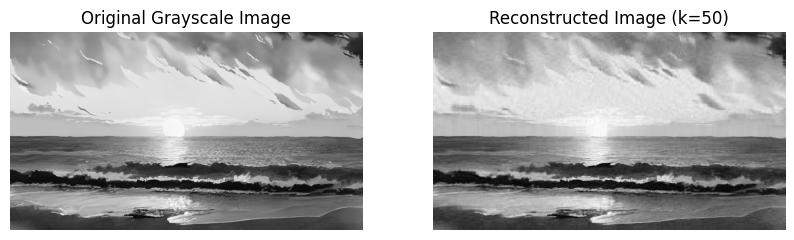

Original size: 2073600
Compressed size (approx): 150000
Compression Ratio: 13.82x smaller


In [19]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1) # row, column, position of image
plt.title("Original Grayscale Image")
plt.imshow(gray_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Reconstructed Image (k={k})")
plt.imshow(X_reconstructed, cmap='gray')
plt.axis('off')

plt.show()

# Compression Ratio Calculation
rows, cols = gray_array.shape

original_size = rows * cols
compressed_size = (rows * k) + (cols * k)

compression_ratio = original_size / compressed_size

print(f"Original size: {original_size}")
print(f"Compressed size (approx): {compressed_size}")
print(f"Compression Ratio: {compression_ratio:.2f}x smaller")

# Increasing k → better quality but lower compression
# Decreasing k → smaller size but more blurry image